In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [104]:
data = pd.read_csv(r"C:\Users\user\Documents\Projects ML\Linear Regression to Predict Sales\advertising.csv")

In [105]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [129]:
# Cleaning the data
data['Sales'] = data['Sales'].apply(lambda x: x*100)

In [107]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,2210.0
1,44.5,39.3,45.1,1040.0
2,17.2,45.9,69.3,1200.0
3,151.5,41.3,58.5,1650.0
4,180.8,10.8,58.4,1790.0


# Simple Linear Regression

In [108]:
#initializing the variables
x = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)

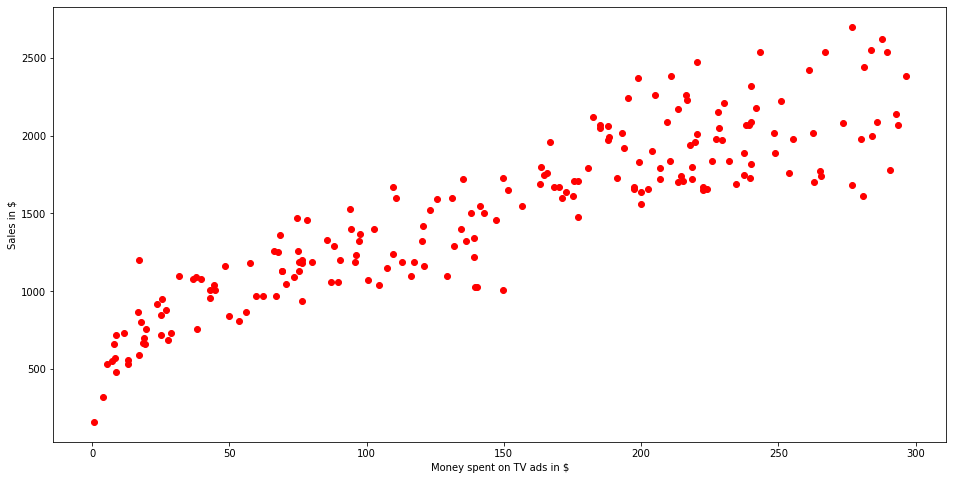

In [109]:
#Plot the graph to see the points
plt.figure(figsize=(16,8))
plt.scatter(x,y,c='r')
plt.xlabel("Money spent on TV ads in $")
plt.ylabel("Sales in $")
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [111]:
#fitting Linear regression into Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [112]:
#Predicting the test set result
Y_pred = lr.predict(X_test)

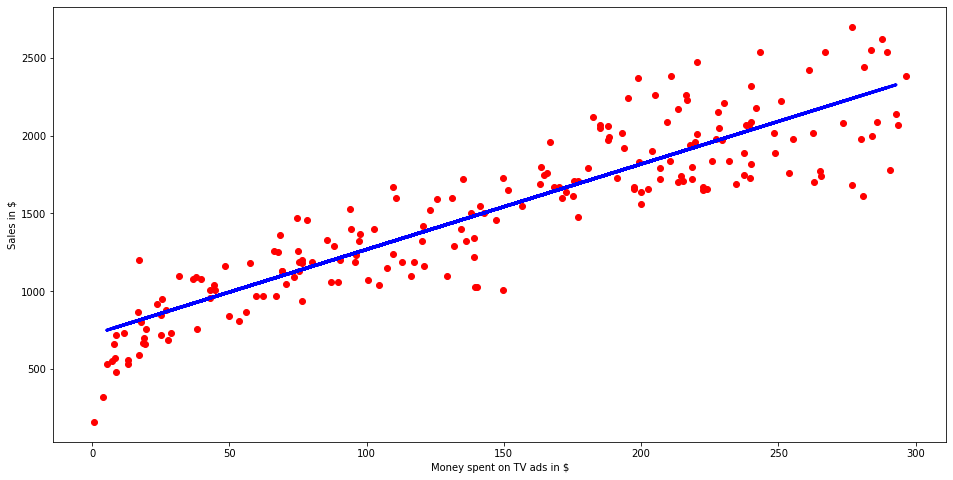

In [113]:
plt.figure(figsize=(16,8))
plt.scatter(x,y,c='r')
plt.plot(X_test,Y_pred,c='b',linewidth = 3)
plt.xlabel("Money spent on TV ads in $")
plt.ylabel("Sales in $")
plt.show()

In [114]:
#calculating the coeff
#This gievs the slope of line
lr.coef_

array([[5.48348838]])

In [115]:
#This is the value of intercept (C)
lr.intercept_

array([720.65545482])

In [116]:
#Calculate the R-squared value
lr.score(X_test,Y_test)

0.8148553892086791

In [117]:
output = lr.predict([[2330]])
output

array([[13497.18337912]])

# Multiple Linear Regression

In [118]:
#Initializing the variables
x = data.drop(['Sales'],axis= 1)
y = y.reshape(-1,1)

In [119]:
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [121]:
#Fitting
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [122]:
Y_pred = lr.predict(X_test)

In [123]:
lr.coef_

array([[ 5.45092708, 10.09453624,  0.43366468]])

In [124]:
lr.intercept_

array([471.41264022])

In [125]:
#Calculate the R-square value
lr.score(X_test,Y_test)

0.9059011844150826

In [126]:
#taking the input from the user 
print("Enter the amount you will invest on:")
tv = float(input("TV"))
radio = float(input("Radio"))
newspaper = float(input("Newspaper")) 

#Predicting the sales with respect to the inputs
output = lr.predict([[tv,radio,newspaper]])
print("You will get Rs{:2f} sales by advertising on Tv Rs{} on Radio and RS{} on newspaper"\
      .format(output[0][0] if output else "Not predictable",tv,radio,newspaper))

Enter the amount you will invest on:
TV22
Radio22
Newspaper22
You will get Rs822.953456 sales by advertising on Tv Rs22.0 on Radio and RS22.0 on newspaper


In [128]:
#Saving the model
if not os.path.exists("Models"):
    os.makedirs("Model")
    
Model_path = 'model/Regression.sav'
pickle.dump(lr,open(Model_path,'wb'))